The __$Binary-logistic$__ __$regression$__ class is defined below. First, it (optionally) standardizes and adds an intercept term.
Then it estimates with gradient descent, using the gradient of the negative log-likelihood derived in the concept
section

In [12]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from warnings import filterwarnings
import seaborn as sns
filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

In [5]:
# ---- import data ----
cancer = datasets.load_breast_cancer()
X = cancer['data']
y = cancer['target']

Let’s first define some helper functions: the logistic function and a standardization function, equivalent __$scikitlearn’s$__ __$StandardScaler$__

In [1]:
def logistic(z) :
    return (1 + np.exp(-z))**(-1)

def standard_scaler(X) :
    mean = X.mean(0)
    std = X.std(0)
    return (X - mean)/std

In [7]:
class BinaryLogisticRegression :
    def fit(self, X, y, n_iter, lr, standardize = True, has_intercept = False) -> None :
        if standardize : 
            X = standard_scaler(X)
        if not has_intercept :
            ones = np.ones(X.shape[0]).reshape(-1, 1)
            X = np.concatenate((ones, X), axis = 1)
        self.X = X
        self.N, self.D = X.shape
        self.y = y
        self.n_iter = n_iter
        self.lr = lr
        
        # ----- Calculate beta -----
        beta = np.random.randn(self.D)
        for i in range(n_iter) :
            # ---- vector of probabilities ----
            p = logistic(np.dot(self.X, beta))
            # -----  gradient -----
            gradient = -np.dot(self.X.T, (self.y - p))
            beta -= self.lr * gradient
            
        # ---- return values ------
        self.beta = beta 
        self.p = logistic(np.dot(self.X, self.beta))
        self.yhat = self.p.round()

In [8]:
binary_model = BinaryLogisticRegression()
binary_model.fit(X, y, n_iter = 10**4, lr = .0001)
print(f"In-sample accuracy : {str(np.mean(binary_model.yhat == binary_model.y))} ")

In-sample accuracy : 0.9876977152899824 


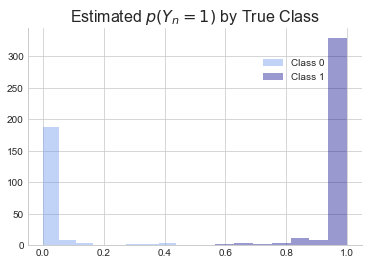

In [13]:
fig, ax = plt.subplots()
sns.distplot(binary_model.p[binary_model.yhat == 0], kde = False, bins = 8, 
            label = 'Class 0', color = 'cornflowerblue')
sns.distplot(binary_model.p[binary_model.yhat == 1], kde = False, bins = 8, 
             label = 'Class 1', color = 'darkblue')
ax.legend(loc = 9, bbox_to_anchor = (0, 0, 1.59, .9))
ax.set_title(r'Estimated $p(Y_n = 1)$', size = 14)
ax.set_title(r'Estimated $p(Y_n = 1)$ by True Class', size = 16)
sns.despine()